Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.<br>
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.<br> Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps: <br>1. Read the dataset. <br>2. Distinguish the feature and target set and divide the data set into training and test sets. <br>3. Normalize the train and test data. <br>4. Initialize and build the model. Identify the points of improvement and implement the same. <br>5. Print the accuracy score and confusion matrix<br><br>

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [115]:
df = pd.read_csv('data/Churn_Modelling.csv')

if ~df.empty:
    print('Loaded!')

Loaded!


In [116]:
print(df.shape)
print(df.columns)
# print(df.info())

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [117]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [118]:
original_df = df.copy(deep=True)

In [119]:
df = original_df

## Preprocessing Dataset

- Removing redundant features
- Handling NA values
- Removing Duplicates
- Feature construction
- One hot encoding
- Handling outliers

In [120]:
# cleaning
df.drop(columns = ['RowNumber',"CustomerId","Surname"],inplace=True)

In [121]:
df.isnull().sum().sum()

0

In [122]:
df.nunique().sort_values()

Gender                2
HasCrCard             2
IsActiveMember        2
Exited                2
Geography             3
NumOfProducts         4
Tenure               11
Age                  70
CreditScore         460
Balance            6382
EstimatedSalary    9999
dtype: int64

In [123]:
print(df.Geography.unique())
print(df.NumOfProducts.unique())

['France' 'Spain' 'Germany']
[1 3 2 4]


In [124]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [125]:
old = df.shape[0]
df.drop_duplicates(inplace=True)
new = df.shape[0]
print(f"{old-new} duplicates found and deleted!")

0 duplicates found and deleted!


In [126]:
# one hot encode
from sklearn.preprocessing import LabelEncoder

In [127]:
le = LabelEncoder()

cat_vars = df.select_dtypes(exclude='number').columns

for cf in cat_vars:
    df[cf] = le.fit_transform(df[cf])
    df[cf] = df[cf].astype("int64")

In [128]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

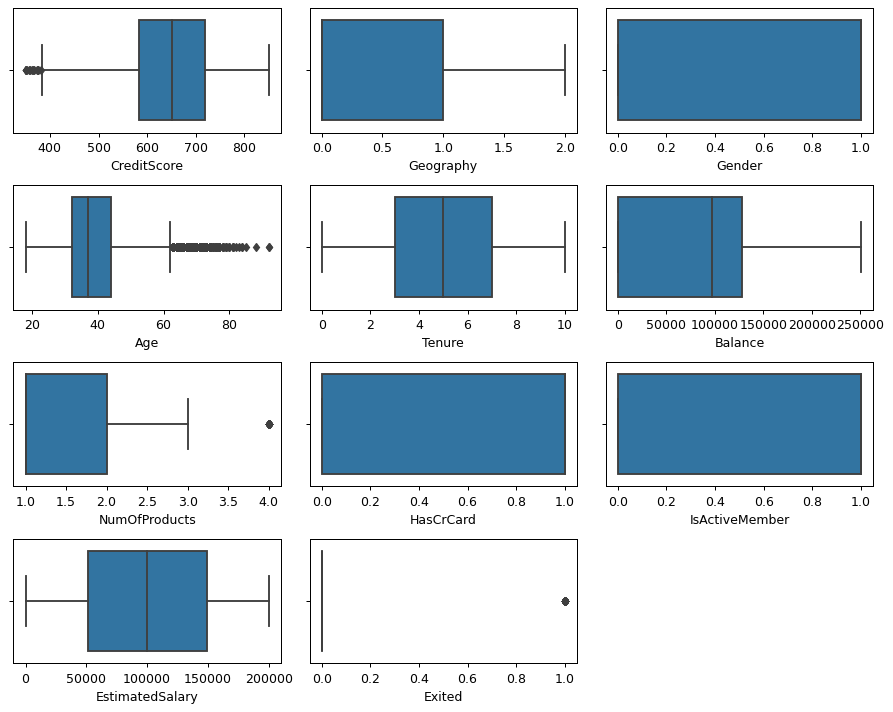

In [80]:
cnt = 1

plt.figure(figsize = [10,8],dpi = 90)
for i in df.columns:
    plt.subplot(4,3,cnt)
    cnt+=1
    sns.boxplot(df[i])
    plt.tight_layout(pad = 1)

plt.show()

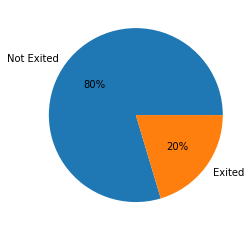

In [114]:
exit_stat = df.Exited.value_counts()
plt.figure()
plt.pie(exit_stat.values,labels = ["Not Exited","Exited"],autopct='%.0f%%')
plt.show()

In [129]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


### Split and normalization

In [134]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [141]:
# normalization
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [144]:
X_normalized

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_normalized,y,test_size = 0.25, random_state = 42,shuffle = True)

In [146]:
print(f"Original set\t-->\t{(X.shape,y.shape)}")
print(f"Training set\t-->\t{(X_train.shape,y_train.shape)}")
print(f"Testing set\t-->\t{(X_test.shape,y_test.shape)}")

Original set	-->	((10000, 10), (10000,))
Training set	-->	((7500, 10), (7500,))
Testing set	-->	((2500, 10), (2500,))


In [149]:
from sklearn.neural_network import MLPClassifier

In [181]:
clf = MLPClassifier(solver = 'adam',alpha=1e-5,verbose = True,activation = "logistic",max_iter = 300)
model = clf.fit(X_train,y_train)
mean_accuracy = model.score(X_test,y_test)
print(f"Mean accuracy of model = {mean_accuracy}")

Iteration 1, loss = 0.54372839
Iteration 2, loss = 0.50543869
Iteration 3, loss = 0.50271023
Iteration 4, loss = 0.49938518
Iteration 5, loss = 0.49666294
Iteration 6, loss = 0.49371894
Iteration 7, loss = 0.49040187
Iteration 8, loss = 0.48715887
Iteration 9, loss = 0.48447362
Iteration 10, loss = 0.48096116
Iteration 11, loss = 0.47784036
Iteration 12, loss = 0.47503614
Iteration 13, loss = 0.47250559
Iteration 14, loss = 0.46984522
Iteration 15, loss = 0.46709362
Iteration 16, loss = 0.46469141
Iteration 17, loss = 0.46299891
Iteration 18, loss = 0.46081924
Iteration 19, loss = 0.45908893
Iteration 20, loss = 0.45738859
Iteration 21, loss = 0.45556103
Iteration 22, loss = 0.45410981
Iteration 23, loss = 0.45353099
Iteration 24, loss = 0.45112926
Iteration 25, loss = 0.45047019
Iteration 26, loss = 0.44823017
Iteration 27, loss = 0.44744207
Iteration 28, loss = 0.44618066
Iteration 29, loss = 0.44521189
Iteration 30, loss = 0.44435467
Iteration 31, loss = 0.44333342
Iteration 32, los

In [182]:
clf = MLPClassifier(solver = 'lbfgs',alpha=1e-5,activation = "relu",max_iter = 300)
model = clf.fit(X_train,y_train)
mean_accuracy = model.score(X_test,y_test)
print(f"Mean accuracy of model = {mean_accuracy}")

Mean accuracy of model = 0.8616


In [183]:
#alpha for L2 regularization

clf = MLPClassifier(solver = 'lbfgs',alpha=1e-5,activation = "logistic",max_iter = 300)
model = clf.fit(X_train,y_train)
mean_accuracy = model.score(X_test,y_test)
print(f"Mean accuracy of model = {mean_accuracy}")

Mean accuracy of model = 0.8632


In [184]:
y_test_pred = model.predict(X_test)

In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
confusion_matrix(y_test,y_test_pred)

array([[1930,   73],
       [ 269,  228]], dtype=int64)

In [190]:
print(classification_report(y_test,y_test_pred,target_names = ["Not exited","Exited"]))

              precision    recall  f1-score   support

  Not exited       0.88      0.96      0.92      2003
      Exited       0.76      0.46      0.57       497

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500

